In [2]:
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as sm
import numpy as np
import math as m
import pandas as pd
from numpy.linalg import lstsq
from scipy.optimize import curve_fit, leastsq
from astropy.io import fits
import sklearn
from sklearn.cluster import KMeans
from scipy.interpolate import griddata

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split


from sklearn.metrics import f1_score


from scipy.optimize import curve_fit, leastsq # for optimizing datas and plots 
from scipy.optimize import fsolve  # this is for solving equations 
from scipy.interpolate import interp1d

In [3]:
nms = ["SDGC","SDGR","RFC","RFR","KNC","KNR","DTR","DTC","ANNC","ANNR","GNB","SVC"]


clf=[SGDClassifier(random_state=42) ,SGDRegressor(random_state=42),
    RandomForestClassifier(),RandomForestRegressor(),
    KNeighborsClassifier(),KNeighborsRegressor(),
    DecisionTreeRegressor(),
    
    DecisionTreeClassifier(),
    
    MLPClassifier(solver='lbfgs',alpha=1e-5, hidden_layer_sizes=(64, 64), random_state=1, max_iter=1000),
    MLPRegressor(solver='lbfgs',alpha=1e-5, hidden_layer_sizes=(64, 64), random_state=1, max_iter=1000),
    GaussianNB(),
    SVC()
    ]

In [4]:
X_train=np.load("input_train_maxnorm.npy")
y_train=np.loadtxt("y_train.dat")
y_test=np.loadtxt("y_test.dat")

In [5]:
X_test=np.load("input_test_maxnorm.npy")

In [6]:
X=np.array(list(X_train)+list(X_test))

ya=np.array(list(y_train)+list(y_test))



In [575]:
r=r.reshape(1, 120238)[0]

NameError: name 'r' is not defined

In [576]:
n, bins, patches = plt.hist(r, 1100, density=True, facecolor='g')

NameError: name 'r' is not defined

In [577]:
y=np.loadtxt("y_train.dat")

In [578]:
y=(ya/1000).astype(int)

In [579]:
y # classification for 1st class

array([1, 1, 1, ..., 4, 6, 4])

In [580]:
y2=(ya-(ya/1000).astype(int)*1000)

In [7]:
y_l=[]
y_r=[]
for i in range(0,len(ya)):
    x,y=int(str(ya[i])[:3]),float(str(ya[i])[3:])
    y_r.append(x)
    y_l.append(y)
    
y_r=np.array(y_r)
y_l=np.array(y_l)

def plot_mat(data):
   
    v=range(0,3000)
    # The normal figure
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    im = ax.imshow(data,cmap="coolwarm")

    for i in range(len(data)):
        for j in range(len(data)):
            text = ax.text(j, i, data[i, j],ha="center", va="center", color="w")
    im.set_clim(0,100.0)
    #fig.colorbar(im)
    plt.show()
    
def get(centers,r_in): # getting DXDY
    data=[]
    for i in range(0,len(r_in)):
        value_chosen=r_in[i]
        x=min(centers, key = lambda x: abs(x-value_chosen))
        data.append(x) #0=x_in,
    return data




In [11]:
y=y_r
len(np.unique(y))



array([150, 155, 165, ..., 480, 600, 480])

In [9]:
np.save("y",y)
np.save("X",X)

In [12]:
#X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test= X[:158],X[158:],y[:158],y[158:]

np.save("X_train_mix",X_train)
np.save("X_test_mix",X_test)
np.save("y_train_mix",y_train)
np.save("y_test_mix",y_test)

In [13]:
for i in []:
    clf[i].fit(X_train,y_train)
    y_train_pred=clf[i].predict(X_train)
    #y_train_pred=np.array(get(y_train,y_train_pred))
    
    y_test_pred=clf[i].predict(X_test)
    #y_test_pred=np.array(get(y_test,y_test_pred))
    
    y_pred=clf[i].predict(X)
    #y_pred=np.array(get(y,y_pred))
    
    #np.savetxt("y_train_pred_mix_"+str(nms[i]),np.array(list(zip(y_train,y_train_pred))))
    #np.savetxt("y_test_pred_mix_"+str(nms[i]),np.array(list(zip(y_test,y_test_pred))))
    #np.savetxt("y_pred_mix_"+str(nms[i]),np.array(list(zip(y,y_pred))))
    from sklearn.metrics import f1_score
    print(f1_score(y_test, y_test_pred, average="macro"),nms[i])
    print("done")


In [585]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.99)
X_r = pca.fit_transform(X)

In [586]:
len(X_r[2])

5

In [587]:
X=X_r

In [588]:
len(y_train)

806

## Simple SGDClassifier for Multiclass

In [416]:
from scipy import stats

39.04562041119387

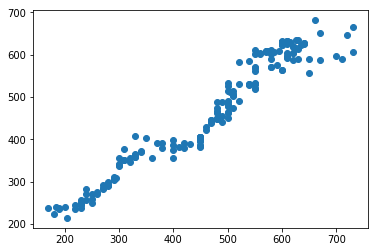

In [592]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

#X_train, X_test, y_train, y_test= X[:158],X[158:],y[:158],y[158:]


sgd_clf = SGDRegressor(random_state=42)
sgd_clf.fit(X_train, y_train)
y_train_pred=sgd_clf.predict(X_train)
y_test_pred=sgd_clf.predict(X_test)
y_pred=sgd_clf.predict(X)
plt.scatter(y_test,y_test_pred)
np.std(y_train-y_train_pred)

In [422]:

def get_stats():

   
    

    x1=y_train
    y1=y_train_pred
    slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
    std=np.std(y1-x1)
    print([slope,intercept,std/10.0,r_value])
    
    x1=y_test
    y1=y_test_pred
    slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
    std=np.std(y1-x1)
    print([slope,intercept,std/10.,r_value])
    
    x1=y
    y1=y_pred
    slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
    std=np.std(y1-x1)

    print([slope,intercept,std/10.,r_value])
    
get_stats()

[0.9750573723400551, 7.501134864678363, 2.644582439594949, 0.9829201024574765]
[0.9613818114960511, 11.084922222025057, 2.6661218328903042, 0.9820710221515137]
[0.9724932043952372, 8.14506906946741, 2.6513197465309526, 0.9827149027452828]


In [419]:
from sklearn.model_selection import cross_val_score
#cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
len(y_train)

806

In [126]:
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_train, y_train_pred)

In [127]:
#confusion_matrix(y_test, y_test_pred)

## Random Forest Classifier

In [500]:
from sklearn.ensemble import RandomForestClassifier

In [501]:
clf_rf=RandomForestClassifier(max_depth=10)

In [502]:
clf_rf.fit(X_train,y_train)

y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
y_pred=clf_rf.predict(X)
np.std(y_test_pred-y_test)
len(y_train)

/home/shrish/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


806

11.33260380798341

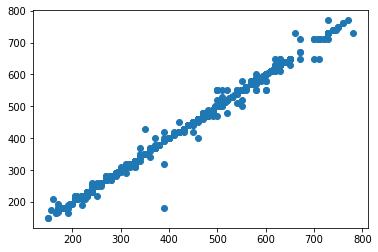

In [503]:

plt.scatter(y,y_pred)
np.std(y-y_pred)

In [504]:
#plot_mat(confusion_matrix(y_train, y_train_pred))

In [505]:
#confusion_matrix(y_test, y_test_pred)

In [506]:
get_stats()
#cross_val_score(clf_rf, X_train, y_train, cv=3, scoring="accuracy")


[0.9992872827408008, 0.4552214306828546, 0.9757605061755756, 0.9976940169940044]
[0.9940293168987393, 1.0918019680496514, 1.6067788615642198, 0.9935479304963994]
[0.9983294707479649, 0.5407470683500719, 1.133260380798341, 0.9968706516771954]


##  KNeighborsClassifier

In [609]:
from sklearn.neighbors import KNeighborsClassifier

In [610]:
clf_knn=KNeighborsClassifier()
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [611]:
y_train_pred=clf_knn.predict(X_train)
y_test_pred=clf_knn.predict(X_test)

y_pred=clf_knn.predict(X)
len(y_train)

806

[0.9985703043246729, -0.7314236820639621, 1.7241476410866947, 0.9928426827015925]
[1.00268099061137, -2.2447232177377145, 1.7304317183776579, 0.9926385446717989]
[0.9993575619319641, -1.0203064802063864, 1.7255050180736446, 0.9928014172597941]


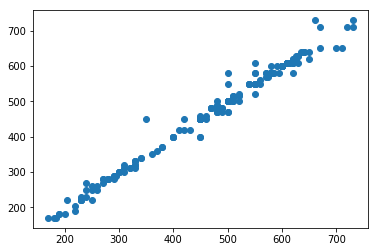

In [612]:
plt.scatter(y_test,y_test_pred)
np.std(y-y_pred)
#len(y_train)
get_stats()

In [441]:
#confusion_matrix(y_test, y_test_pred)

In [442]:
#cross_val_score(clf_knn, X_train, y_train, cv=3, scoring="accuracy")

## DecisionTreeClassifier

In [597]:
from sklearn.tree import DecisionTreeClassifier


In [598]:
clf_dtc=DecisionTreeClassifier(max_depth=13)
clf_dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [599]:
y_train_pred=clf_dtc.predict(X_train)
y_test_pred=clf_dtc.predict(X_test)
y_pred=clf_dtc.predict(X)

np.std(y_test_pred-y_test),np.mean(y_test_pred-y_test),np.std(y_train_pred-y_train),np.mean(y_train_pred-y_train)


(28.1243566733599, -3.787128712871287, 21.38334499519586, -0.5086848635235732)

22.931387746696775

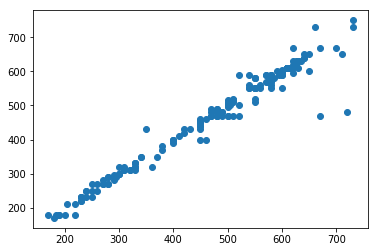

In [600]:
#confusion_matrix(y_train, y_train_pred)
plt.scatter(y_test,y_test_pred)
np.std(y-y_pred)

In [601]:
#confusion_matrix(y_test, y_test_pred)
get_stats()

[0.9903928639665931, 4.122348048857816, 2.138334499519586, 0.9889193928013364]
[0.9794734770113238, 6.008189027195272, 2.8124356673359903, 0.9802080002875359]
[0.9883824052922773, 4.423218279433456, 2.2931387746696776, 0.9871800922386812]


## ANN

In [14]:
from sklearn.neural_network import MLPClassifier

In [15]:
clf_ann=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64, 64), random_state=1, max_iter=1000)
clf_ann.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 64), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
y_train_pred=clf_ann.predict(X_train)
y_test_pred=clf_ann.predict(X_test)
y_pred=clf_ann.predict(X)
#clf_ann.predict_proba(X_test)
np.std(y_test_pred-y_test),np.mean(y_test_pred-y_test),np.std(y_train_pred-y_train),np.mean(y_train_pred-y_train)


(23.246675544589866, 1.5823529411764705, 2.01937419411947, 0.189873417721519)

Text(0,0.5,'Predicted Data')

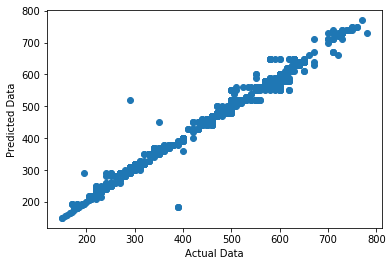

In [18]:
#get_stats()
plt.scatter(y,y_pred)


plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')

array([150, 155, 165, ..., 480, 600, 480])

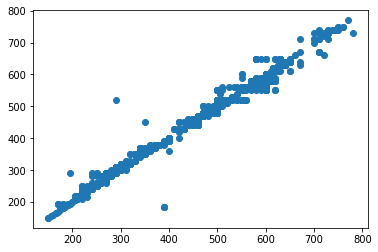

In [19]:
#confusion_matrix(y_train, y_train_pred)



np.std(y-y_pred)
def get_DxDy(centers,r_in): # getting DXDY
    data=[]
    for i in range(0,len(r_in)):
        value_chosen=r_in[i]
        x=min(centers, key = lambda x: abs(x-value_chosen))
        data.append(x) #0=x_in,
    return data


y_pred_r=np.array(get_DxDy(y,y_pred))
plt.scatter(y,y_pred_r)

#print(y_pred_r)
y

In [520]:
from scipy import stats
stats.linregress(y,y_pred_r)
np.std(y-y_pred_r)

7.370182167600098

In [487]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred, average="macro")

/home/shrish/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6794936292957107

## Using lebel binarizer

In [244]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_b_train = encoder.fit_transform(y_train)
y_b_test = encoder.fit_transform(y_test)
y_b_train

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
#encoder.inverse_transform(y_b_test)
clb_ann=MLPClassifier()
clb_ann.fit(X_train,y_b_train)

In [ ]:
clf_rf_b=RandomForestClassifier()
clf_rf_b.fit(X_train,y_b_train)

In [ ]:
y_train_pred=clf_rf_b.predict(X_train)
y_test_pred=clf_rf_b.predict(X_test)
y_tr_p=encoder.inverse_transform(y_train_pred)
y_te_p=encoder.inverse_transform(y_test_pred)



y_train_preda=clb_ann.predict(X_train)
y_test_preda=clb_ann.predict(X_test)
y_tr_pa=encoder.inverse_transform(y_train_preda)
y_te_pa=encoder.inverse_transform(y_test_preda)

In [ ]:
confusion_matrix(y_train, y_tr_p)

In [ ]:
confusion_matrix(y_train, y_tr_pa)

In [ ]:
confusion_matrix(y_test, y_te_p)

In [ ]:
confusion_matrix(y_test, y_te_pa)

## SVM

In [488]:
from sklearn.svm import SVC

In [489]:
clf_svc=SVC(gamma=2, C=1)
clf_svc.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [490]:
y_train_pred=clf_svc.predict(X_train)
y_test_pred=clf_svc.predict(X_test)
y_pred=clf_svc.predict(X)

22.155267237448275

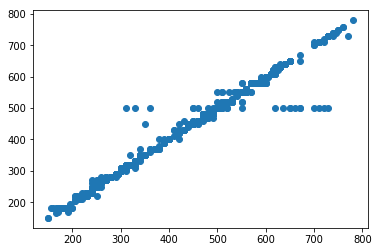

In [491]:
#confusion_matrix(y_train, y_train_pred)

plt.scatter(y,y_pred)
np.std(y-y_pred)

In [492]:
get_stats()

[0.9938637658962015, 3.0695786044395845, 0.6392841682649034, 0.9990162756898806]
[0.8820754776235488, 50.7541303687031, 4.754989150501824, 0.9417857256400464]
[0.9722074614839862, 12.353331128160164, 2.2155267237448273, 0.9879529297403713]


## Gaussian NB

In [493]:
from sklearn.naive_bayes import GaussianNB

In [494]:
clf_nb=GaussianNB()
clf_nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

23.338444410221022

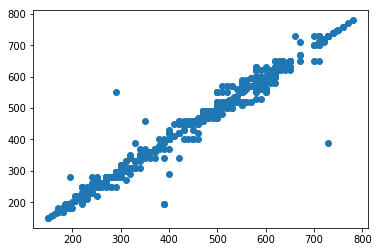

In [495]:
y_train_pred=clf_nb.predict(X_train)
y_test_pred=clf_nb.predict(X_test)
y_pred=clf_nb.predict(X)
plt.scatter(y,y_pred)
np.std(y-y_pred)

In [496]:
confusion_matrix(y_test, y_test_pred)

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [497]:
data=confusion_matrix(y_train, y_train_pred)

In [498]:
get_stats()

[0.9941515163498793, 1.4854616751403569, 2.092291245532894, 0.9894362658494203]
[0.9616169452896587, 15.494725538630462, 3.1137000383200766, 0.9755111850065725]
[0.9878437536649581, 4.2160783460203675, 2.3338444410221024, 0.9867197540389323]


In [499]:
def plot_mat(data):
   
    v=range(0,3000)
    # The normal figure
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    im = ax.imshow(data,cmap="coolwarm")

    for i in range(len(data)):
        for j in range(len(data)):
            text = ax.text(j, i, data[i, j],ha="center", va="center", color="w")
    im.set_clim(0,100.0)
    #fig.colorbar(im)
    plt.show()
    

In [1]:
#plot_mat(confusion_matrix(y_train, y_train_pred))

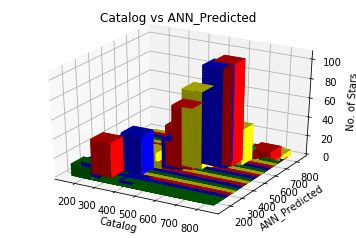

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#res = np.loadtxt("result_test", unpack=True)
#print(res[0], res[1])

#hist, xedges, yedges = np.histogram2d(res[0], res[1], bins=36)
hist, xedges, yedges = np.histogram2d(y, y_pred, bins=20)

# Construct arrays for the anchor positions of the 36 bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
# with indexing='ij'.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 100 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

#color = ['green', 'blue', 'red', 'yellow'] * 324
color = ['green', 'blue', 'red', 'yellow'] * 100

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=color, zsort='average')

ax.set_xlabel('Catalog')
ax.set_ylabel('ANN_Predicted')
ax.set_zlabel('No. of Stars')
ax.set_title('Catalog vs ANN_Predicted')
plt.savefig('3d.eps')
plt.show()